In [1]:
#importamos las librerias necesarias
import pandas as pd
import yfinance as yf

In [28]:
# iniciamos haciendo un webscrapping para extraer datos de los simbolos de las acciones que conforman el sp500 y sus sectores

URL = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'

SP500Companies = pd.read_html(URL)[0][['Symbol', 'GICS Sector']].rename(columns={'GICS Sector': 'Sector'}).copy()

# Renombramos las columnas 
SP500Companies.rename(columns={'GICS Sector': 'Sector'}, inplace=True)

# Renombramos algunos simbolos 
SP500Companies['Symbol'] = SP500Companies['Symbol'].str.strip().replace({'BF.B': 'BF-B', 'BRK.B': 'BRK-B'})

# Definir el rango de fechas
start_date = '2000-01-01'
end_date = '2023-02-24'

# Crear un DataFrame vacío para almacenar los datos
sp500_data = pd.DataFrame()

# Iterar a través de cada compañia del SP500 y agregamos los datos al Dataframe creado
for _, company in SP500Companies.iterrows():
    symbol = company['Symbol']
    sector = company['Sector']
    # Descargamos los datos de cada compañia
    data = yf.download(symbol, start=start_date, end=end_date)['Adj Close']
    if len(data) > 0:
        data = data.to_frame()
        data.loc[:, 'Symbol'] = symbol
        data.loc[:, 'Sector'] = sector
        sp500_data = pd.concat([sp500_data, data], axis=0)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [3]:
#ingestamos los datos del sp500
sp5001 = yf.download('^GSPC', start='2000-01-01', end='2023-01-31', rounding=True, group_by='Date')
sp5001

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,1469.25,1478.00,1438.36,1455.22,1455.22,931800000
2000-01-04,1455.22,1455.22,1397.43,1399.42,1399.42,1009000000
2000-01-05,1399.42,1413.27,1377.68,1402.11,1402.11,1085500000
2000-01-06,1402.11,1411.90,1392.10,1403.45,1403.45,1092300000
2000-01-07,1403.45,1441.47,1400.73,1441.47,1441.47,1225200000
...,...,...,...,...,...,...
2023-01-24,4001.74,4023.92,3989.79,4016.95,4016.95,3320430000
2023-01-25,3982.71,4019.55,3949.06,4016.22,4016.22,3724020000
2023-01-26,4036.08,4061.57,4013.29,4060.43,4060.43,3809590000


In [29]:
# Obteniendo los datos de solo el SP500
sp500_index = yf.download('^GSPC', start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [4]:
#mdificamos la tabla para que la columna 'date' quede bien y agregamos columnas para ordenar la fecha
sp5001.reset_index(inplace=True)
sp5001.insert(loc=1, column='Datey', value=(sp5001['Date'].dt.year))
sp5001.insert(loc=2, column='Datem', value=(sp5001['Date'].dt.month))
sp5001.insert(loc=8, column='Revenue', value=(sp5001['Adj Close'] - sp5001['Open']))
sp5001

,Date,Datey,Datem,Open,High,Low,Close,Adj Close,Revenue,Volume
0,2000-01-03,2000,1,1469.25,1478.00,1438.36,1455.22,1455.22,-14.03,931800000
1,2000-01-04,2000,1,1455.22,1455.22,1397.43,1399.42,1399.42,-55.80,1009000000
2,2000-01-05,2000,1,1399.42,1413.27,1377.68,1402.11,1402.11,2.69,1085500000
3,2000-01-06,2000,1,1402.11,1411.90,1392.10,1403.45,1403.45,1.34,1092300000
4,2000-01-07,2000,1,1403.45,1441.47,1400.73,1441.47,1441.47,38.02,1225200000
...,...,...,...,...,...,...,...,...,...,...
5801,2023-01-24,2023,1,4001.74,4023.92,3989.79,4016.95,4016.95,15.21,3320430000
5802,2023-01-25,2023,1,3982.71,4019.55,3949.06,4016.22,4016.22,33.51,3724020000
5803,2023-01-26,2023,1,4036.08,4061.57,4013.29,4060.43,4060.43,24.35,3809590000
5804,2023-01-27,2023,1,4053.72,4094.21,4048.70,4070.56,4070.56,16.84,3907760000


In [5]:
sp500_m = sp5001.groupby(['Datey' , 'Datem']).Revenue.sum()
sp500_m = sp500_m.reset_index()
sp500_m

,Datey,Datem,Revenue
0,2000,1,-74.79
1,2000,2,-28.03
2,2000,3,132.15
3,2000,4,-46.16
4,2000,5,-31.82
...,...,...,...
272,2022,9,-216.17
273,2022,10,287.50
274,2022,11,61.10
275,2022,12,-204.22


In [6]:
sp500_y = sp5001.groupby('Datey').Revenue.sum()
sp500_y

Datey
2000   -151.22
2001   -174.79
2002   -256.23
2003    231.99
2004     99.27
2005     35.88
2006    175.36
2007     56.72
2008   -502.18
2009    258.13
2010    150.13
2011      5.19
2012    168.38
2013    378.08
2014    156.65
2015    -50.47
2016    141.05
2017    200.92
2018   -425.83
2019    435.65
2020     26.71
2021    558.16
2022   -530.04
2023    185.79
Name: Revenue, dtype: float64

In [7]:
sp500_y = sp500_y.reset_index()
sp500_y

,Datey,Revenue
0,2000,-151.22
1,2001,-174.79
2,2002,-256.23
3,2003,231.99
4,2004,99.27
5,2005,35.88
6,2006,175.36
7,2007,56.72
8,2008,-502.18
9,2009,258.13


In [ ]:
sp5001.to_csv('./sp500p.csv')

In [35]:
# Guardo ambos datasets en archivos csv

sp500_index.to_csv('./GSPC.csv')
sp500_data.to_csv('./companies.csv')

In [46]:
# Abrimos el dataset de GSPC

sp500 = pd.read_csv('./GSPC.csv')

# Cambiamos su indice a date
sp500.set_index('Date', inplace=True)

In [38]:
# Nos aseguramos que el index este en formato fecha
sp500.index= pd.to_datetime(sp500.index)

In [47]:
sp500_index

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
1,2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2,2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
3,2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
4,2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000
...,...,...,...,...,...,...,...
5818,2023-02-16,4114.750000,4136.540039,4089.489990,4090.409912,4090.409912,4143660000
5819,2023-02-17,4077.389893,4081.510010,4047.949951,4079.090088,4079.090088,4045480000
5820,2023-02-21,4052.350098,4052.350098,3995.189941,3997.340088,3997.340088,4121590000
5821,2023-02-22,4001.830078,4017.370117,3976.899902,3991.050049,3991.050049,4079320000


In [39]:
# Nombre del dia
sp500['Day Name'] = sp500.index.day_name()

# Tasa del retorno activo

sp500['Daily Return'] = sp500['Adj Close'].pct_change()

In [41]:
# Volvemos a guardar el dataset
sp500.to_csv('./GSPC.csv')

In [49]:
sp500= sp500.reset_index()
sp500

,Date,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume,Day Name,Daily Return
0,2000-01-03,0,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000,Monday,NaN
1,2000-01-04,1,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000,Tuesday,-0.038345
2,2000-01-05,2,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000,Wednesday,0.001922
3,2000-01-06,3,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000,Thursday,0.000956
4,2000-01-07,4,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000,Friday,0.027090
...,...,...,...,...,...,...,...,...,...,...
5818,2023-02-16,5818,4114.750000,4136.540039,4089.489990,4090.409912,4090.409912,4143660000,Thursday,-0.013789
5819,2023-02-17,5819,4077.389893,4081.510010,4047.949951,4079.090088,4079.090088,4045480000,Friday,-0.002767
5820,2023-02-21,5820,4052.350098,4052.350098,3995.189941,3997.340088,3997.340088,4121590000,Tuesday,-0.020041
5821,2023-02-22,5821,4001.830078,4017.370117,3976.899902,3991.050049,3991.050049,4079320000,Wednesday,-0.001574


In [51]:
# Hacemos que el indice sea la columna date y nos aseguremos que este en formato fecha
sp500.set_index('Date', inplace=True)
sp500.index = pd.to_datetime(sp500.index)

In [52]:
#importo librerias necesarias para realizar graficos
import matplotlib.pyplot as plt
import seaborn as sns


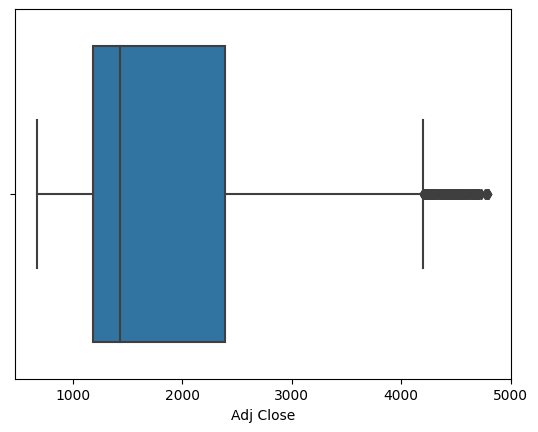

In [53]:
#1er grafico para detectar outliers
sns.boxplot(x = 'Adj Close', data = sp500)
plt.show()

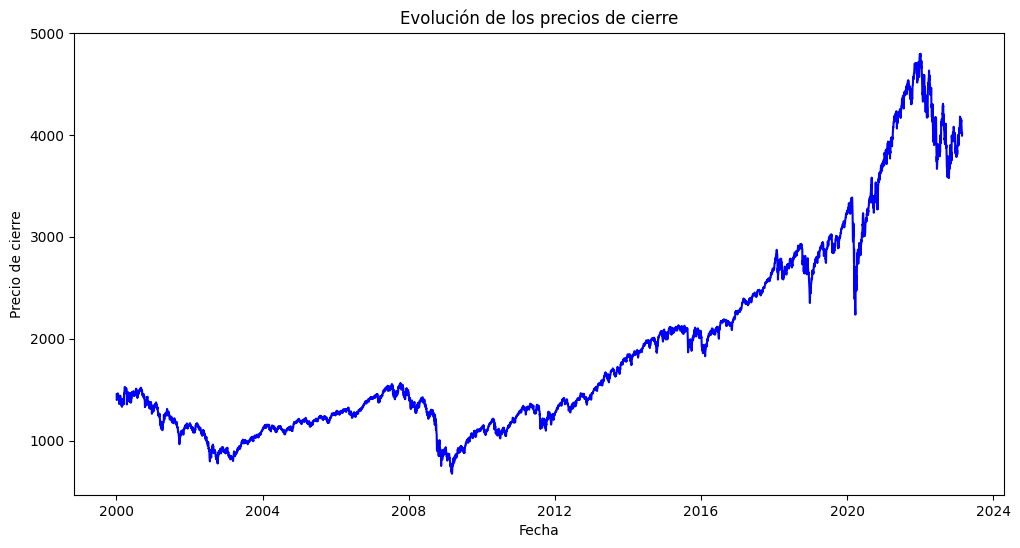

In [55]:
#2do grafico: evolucion del precio de cierre 
cierre = sp500["Close"]

plt.figure(figsize=(12,6))
plt.plot(cierre.index, cierre, color="blue")
plt.title("Evolución de los precios de cierre")
plt.xlabel("Fecha")
plt.ylabel("Precio de cierre")
plt.show()

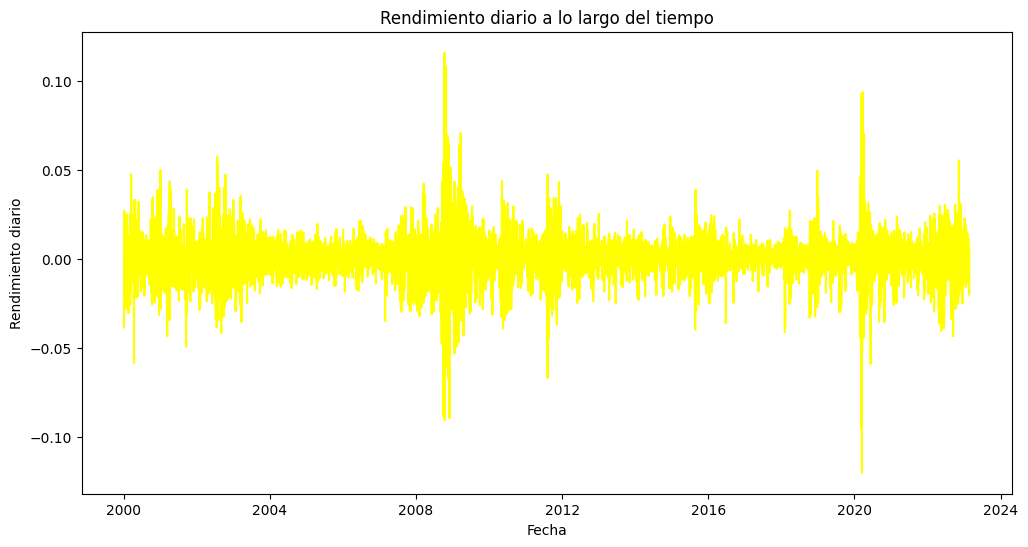

In [56]:
#3er graffico: rendimiento diario
rendim_d = sp500["Close"].pct_change()

plt.figure(figsize=(12,6))
plt.plot(rendim_d.index, rendim_d, color="yellow")
plt.title("Rendimiento diario a lo largo del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Rendimiento diario")
plt.show()

SP500 POR SECTOR

In [58]:
Companias = pd.read_csv('./companies.csv')

In [59]:
# Setteamos como indice la columna Date y nos aseguremos que tenga sea reconocida como fecha
Companias.set_index('Date', inplace=True)
Companias.index = pd.to_datetime(Companias.index)

In [60]:
Companias['Day Name'] = Companias.index.day_name()
Companias['Daily Return']=Companias['Adj Close'].pct_change()

In [63]:
#numero de empresa por sector
empresas_sector = Companias.groupby('Sector')['Symbol'].nunique()
empresas_sector

Sector
Communication Services    24
Consumer Discretionary    53
Consumer Staples          37
Energy                    23
Financials                73
Health Care               65
Industrials               73
Information Technology    66
Materials                 29
Real Estate               30
Utilities                 30
Name: Symbol, dtype: int64

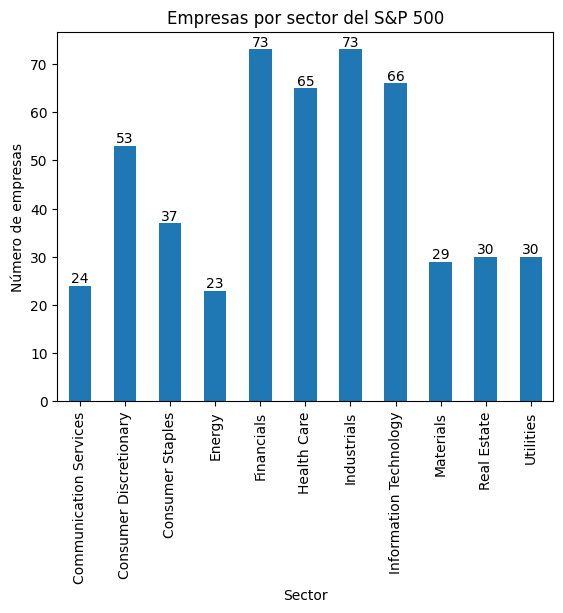

In [64]:
empresas_sector.plot(kind='bar')

# Agregar etiquetas a las barras
for i, v in enumerate(empresas_sector.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
    
plt.title('Empresas por sector del S&P 500')
plt.xlabel('Sector')
plt.ylabel('Número de empresas')

plt.show()

In [65]:
# Agrupar los datos por sector y año, y calcular el rendimiento anual promedio
groupo_sector= Companias.groupby(['Sector', pd.Grouper(freq='Y')])['Adj Close'].mean().reset_index()
groupo_sector

,Sector,Date,Adj Close
0,Communication Services,2000-12-31,16.630976
1,Communication Services,2001-12-31,15.054645
2,Communication Services,2002-12-31,12.889640
3,Communication Services,2003-12-31,13.486497
4,Communication Services,2004-12-31,14.971482
...,...,...,...
259,Utilities,2019-12-31,58.892423
260,Utilities,2020-12-31,60.671098
261,Utilities,2021-12-31,65.614427
262,Utilities,2022-12-31,72.379272


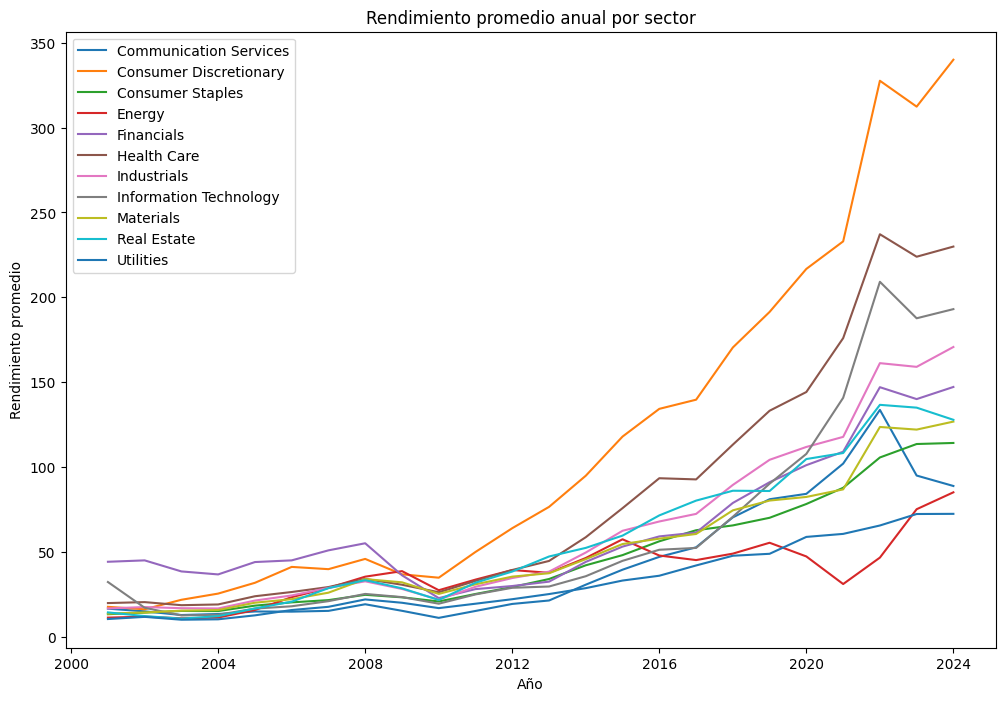

In [66]:
fig, ax = plt.subplots(figsize=(12,8))

# Iterar sobre cada sector y graficar su rendimiento promedio anual
for sector, data in groupo_sector.groupby('Sector'):
    ax.plot(data['Date'], data['Adj Close'], label=sector)

# Agregar un título y etiquetas a los ejes
ax.set_title('Rendimiento promedio anual por sector')
ax.set_xlabel('Año')
ax.set_ylabel('Rendimiento promedio')
ax.legend()

plt.show()

In [3]:
#descargo los datos de nvidia
nvidia=yf.download("NVDA",start="2000-01-01")

[*********************100%***********************]  1 of 1 completed


In [4]:
nvidia= pd.DataFrame(nvidia)

In [9]:
nvidia['Daily Return'] = nvidia['Adj Close'].pct_change()

In [16]:
nvidia= nvidia.reset_index()
nvidia

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Return
0,2000-01-03,0.984375,0.992188,0.919271,0.975260,0.894895,30091200,NaN
1,2000-01-04,0.958333,0.960938,0.901042,0.949219,0.871000,30048000,-0.026702
2,2000-01-05,0.921875,0.937500,0.904948,0.917969,0.842325,18835200,-0.032922
3,2000-01-06,0.917969,0.917969,0.822917,0.858073,0.787365,12048000,-0.065248
4,2000-01-07,0.854167,0.881510,0.841146,0.872396,0.800508,7118400,0.016692
...,...,...,...,...,...,...,...,...
5841,2023-03-22,264.250000,275.890015,262.369995,264.679993,264.679993,79729500,0.010268
5842,2023-03-23,271.149994,274.989990,266.899994,271.910004,271.910004,56488900,0.027316
5843,2023-03-24,270.309998,271.670013,263.549988,267.790009,267.790009,45492000,-0.015152
5844,2023-03-27,268.369995,270.000000,263.649994,265.309998,265.309998,36102600,-0.009261


In [17]:
nvidia.to_csv('nvidia.csv', index=False)